# **COMPUTACIÓN NUMÉRICA: PRÁCTICA 2**
# **Rubén Martínez Gijón y Jon Zorrilla Gamboa**

**Aplicación de Métodos de Monte Carlo a la computación Bayesiana**

### **Interferencia Bayesiana (Teorema de Bayes)**

**Introducción**

In [1]:
# for latex equations
from IPython.display import Math, Latex

#This cell imports the packages to be used
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import beta, binom, norm, uniform, kstest
from scipy.integrate import quad

En un enfoque bayesiano de la estadística, un parámetro  $\theta$  se considera una variable aleatoria con una determinada distribución de probabilidad. El teorema de Bayes relaciona la información inicial que se tiene del parámetro  $\theta$  antes de realizar un experimento y la información que se dispone después de realizar el experimento.
- La información inicial que se tiene sobre  $\theta$  se representa mediante su distribución a priori  $\pi(\theta)$
- La información que se tiene de  $\theta$  después de realizar uno (o varios) experimento/s,  x , se codifica mediante su distribución a posteriori  $\pi(\theta|x)$ .
- El teorema de Bayes nos permite obtener la densidad de probabilidad  $\pi(\theta|x)$  en función del resultado del experimento y la densidad de probabilidad a priori  $\pi(\theta)$.
\begin{equation}
\pi (\theta|x) = \frac{\pi (x|\theta)}{\int_{-\infty}^{\infty} \pi (x|\theta) \pi(\theta) d\theta} \pi(\theta)
\end{equation}
- La cantidad  $\pi(x|\theta)$  del numerador se denomina verosimilitud (likelihood). Es una función y representa la probabilidad de observar el resultado del experimento  x  (muestra) en función del valor del parámetro  $\theta$.
\begin{equation}
\pi(x|\theta) = \prod_i f(x_i | \theta)
\end{equation}
siendo $x_i$ con $i=1, \ldots, n$ los resultados del experimento (valores muestrales) y $f(x_i | \theta)$ sus probabilidades para un determinado valor de $\theta$.
- El denominador $\int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \; d\theta$, una vez realizada la integración, **no** depende del parámetro $\theta$. Es una constante de normalización.
- Para realizar previsiones se utilizan *distribuciones predictivas* (valor esperado de una determinada función).
\begin{equation}
E[ g(y|x) ] = \int g(y| \theta) \; \pi(\theta | x)\; d\theta
\end{equation}
Por ejemplo, es habitual usar como *predictor* del valor de la v.a $\theta$ su valor esperado: $$ \widehat{\theta} = \int \theta \; \pi(\theta | x) \; d\theta $$
- Cuando las distribuciones a priori y a posteriori son del mismo tipo se dice que son "conjugadas a priori". A menudo esto implica grandes beneficios desde el punto de vista computacional.
- La descripción formal de la inferencia bayesiana es sencilla, sin embargo su implementación **habitualmente no es fácil** y requiere Métodos de Monte Carlo.

### **EJERCICIO 1**

Estimar la probabilidad de que un paciente ingresado en planta acabe en la UCI.

Para realizar este problema mediante inferencia Bayesiana debemos tener en cuenta:

- La probabilidad de que un paciente ingresado en planta acabe en la UCI será nuestro parámetro  $\theta$ . Como hemos visto, en el enfoque bayesiano debemos considerar que  $\theta$  es una variable aleatoria.

- Debemos conocer la distribución de la v.a  $\theta$  antes de realizar el experimento, es decir su densidad de probabilidad a priori  $\pi(\theta)$ . Supongamos, por ejemplo, que  $\pi(\theta) = B(\theta | \alpha = 5, \beta = 10)$.

Debemos incorpora el resultado del experimento. Considerad el siguiente experimento: se contabiliza cuantos de los pacientes que hay en planta (n) deben ingresar en la UCI (k). Se observa que de los  n=20  pacientes en planta  k=1  ingresan en la UCI.

Debemos calcular la función de verosimilitud  $\pi(x|\theta)$  del resultado del experimento. La función de verosimilitud será proporcional a la probabilidad de observar el resultado del experimento en función del valor de  $\theta$:
\begin{equation}
\pi(x|\theta) \propto \theta^{k} (1 - \theta)^{n-k}
\end{equation}

donde, en este caso, habría que substituir  n=20  y  k=1 . Notad como en la ecuación anterior  $\pi(x|\theta)$  no está normalizada.

Debemos elegir un predictor adecuado a nuestro problema. Como predictor de  $\theta$  la probabilidad de que un paciente de la planta acabe en la UCI utilizaremos su valor esperado  $E[\theta]$ . Nos preguntarnos entonces:

¿Cuál es el valor de  $E[\theta]$  antes de realizar el experimento?
¿Cuál es el valor de  $E[\theta]$  después de observar el resultado del experimento?
**Ayuda**

La pregunta (1) es fácil. Al ser la distribución a priori  $\pi(\theta)$  la distribución  Beta , su valor esperado será
\begin{equation}
\mu_{\text{prior}} = E[\theta]_{\text{prior}} = \int_{-\infty}^{\infty} \theta \; B(\theta | \alpha, \beta) \; d\theta = \frac{\alpha}{\alpha + \beta} 
\end{equation}
Para la pregunta (2) se debe calcular:
\begin{equation}
\mu_{\text{posterior}}= E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d\theta
\end{equation}

Para ello se necesita conocer la distribución a posteriori  $\pi(\theta|x)$ . Utilizando el teorema de Bayes, tras re-ordenar términos se obtiene:
\begin{equation}
\begin{split}
E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta \ \pi(\theta | x) \ d \theta = \\
& = \int_{-\infty}^{\infty} \theta \ \frac{ \pi(x |\theta) \ \pi(\theta) } { \int_{-\infty}^{\infty} \pi(x |\theta) \pi(\theta) \ d \theta} \ d \theta = \frac{\int_{-\infty}^{\infty} \theta \ \pi(x | \theta) \ \pi(\theta) \ d\theta } { \int_{-\infty}^{\infty} \pi(x |\theta) \ \pi(\theta) \ d \theta}  \\
& = \frac{\int_{-\infty}^{\infty} \theta \theta^k(1-\theta)^{n-k} \pi(\theta) d \theta} {\int_{-\infty}^{\infty} \pi(x | \theta) \; \pi(\theta) \;d \theta}  = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,\beta=10) \; d \theta}
\end{split}
\end{equation}
donde se han sustituido los valores de  $\pi(\theta)$  y de la verosimilitud $\pi(x|\theta)$.

Sino supiésemos resolver analíticamente las integrales anteriores (en este caso sí hay solución analítica aunque no es fácil) podemos estimar el numerador y el denominador mediante integración de Monte Carlo.


### Solución analítica: aplicación teoría de Bayes<a href="#Solución-analítica:-aplicación-teoría-de-Bayes" class="anchor-link"></a>

En el problema se sugiere utilizar una estrategia de Monte Carlo para
estimar el valor esperado de la distribución de probabilidad *a
posteriori* de $\theta$, siendo $\theta$ la probabilidad de que un
paciente en planta ingrese en la UCI.

En realidad, en este caso concreto, **no** es necesario utilizar Monte
Carlo. Cuando la distribución *a priori* $\pi(\theta)$ es una
distribución $Beta (\theta|\alpha, \beta)$ y la función de
verosimilitud $\pi(x| \theta)$ está dada por (5), la distribución
*a posteriori* $\pi(\theta| x)$ tiene una *expresión cerrada*. En
este caso $\pi(\theta| x)$ es también una distribución $Beta$ (se
dice que ambas son *conjugadas a priori*) de parámetros $\alpha'$ y
$\beta'$ donde $\alpha' = \alpha +k$ y $\beta'=\beta +
(n-k)$. Es decir, el parámetro $\alpha$ se incrementa en $k$ (el
número de éxitos del experimento) y $\beta$ en $n-k$ (el número de
fracasos).

En la gráfica siguiente se representan las distribuciones *a priori, a
posteriori* y *verosimilitud* para los valores propuestos por el
problema, $ \pi(\theta) = Beta(\theta|\alpha=5,\beta=10)$
$n=20$ y $k=1$.

    Expected probability a priori: 0.333 
    Expected probability a posterior: 0.171
    Maximum likelihood: 0.050
    Experimento: 
     Total pacientes:20  UCI:1

![](1.png)

Como se observa la distribución a *posteriori* se sitúa entre la
distribución a priori (el conocimiento del que dispongo antes de
realizar el experimento) y la *verosimilitud* (el conocimiento que me
aporta *exclusivamente* el resultado del experimento).

En el problema estamos interesados en hallar el valor esperado de la v.a
$\theta$ para las distribuciones *a priori* y *a posteriori*. O lo
que es lo mismo, debemos hallar el valor esperado de una v.a aleatoria
que se distribuye según una $Beta (\theta |\alpha, \beta)$ de
parámetros conocidos. Se puede demostrar que

$$
\mu = E[\theta] := \int_0^1 \theta \; B(\theta | \alpha,
\beta) \; d\theta = \frac{\alpha}{\alpha + \beta} 
$$

**¿Qué ocurre cuando aumenta el tamaño del experimento?**

En la gráfica siguiente se ha incrementado la muestra del experimento,
$n=100$, pero manteniendo el ratio $\frac k n = 0.05$ del experimento
original

    Expected probability a priori: 0.333 
    Expected probability a posterior: 0.087
    Maximum likelihood: 0.050
    Experimento: 
     Total pacientes:100  UCI:5

![](2.png)

Algunas consecuencias interesantes a partir del conocimiento de la
expresión analítica de $\pi(\theta | x)$:

-   Al ser $\pi(\theta|x)$ también una distribución Beta, el valor
    esperado de $\theta$ a posteriori, i.e., después de observar el
    resultado del experimento, es

$$
\mu_{posterior} = \frac{\alpha'}{\alpha' + \beta'} =
\frac{\alpha + k}{\alpha + k + \beta + n - k} 
$$

Cuando el número de pacientes del experimento es muy grande, $n, k \to
\infty$, $\mu_{posterior}$ converge al valor de máxima
verosimilitud (MLE) $\frac k n$. Es decir, cuando $n \to \infty$, **el
*conocimiento a priori* es irrelevante frente a la información que
aporta el experimento.**

-   **La *incertidumbre* en torno al valor esperado
    $\mu_{posterior}$ decrece con $n \to \infty$**

$$
\sigma^2 = \lim_{n \to \infty} \frac{ \alpha' \beta'}{
(\alpha' + \beta')^2 (\alpha' + \beta' +1) } = \frac{k n -k^2}{n^3}
= 0 
$$

**Remark 1** El valor máximo de la verosimilitud MLE de una v.a
$\theta$ es el valor de $\theta$ para el cual la función de
verosimilitud es máxima 
    $$ 
    \theta_{MLE} = \text{argmax}_{\theta} \pi(x | \theta)
    $$ 
Habitualmente se calcula maximizando el logarítmo de $\pi(x|\theta)$:
    $$
    \frac{\partial}{\partial \theta} \log (\pi (x | \theta) ) = 0 
    $$
Para este problema, en el que $\pi(x| \theta)$ está dada por la
ecuación (5) 
    $$ 
    \frac{\partial }{\partial \theta}\left( k \log
(\theta) + (n-k) \log(1-\theta) \right) = 0
    $$
    se obtiene $\theta_{MLE} = \frac k n$
</div>

### **NUESTRA IMPLEMENTACIÓN**

En primer lugar, definimos las funciones necesarias para representar la probabilidad a priori, probabilidad a posteriori y verosimilitud, en función de $\theta$, que es la probabilidad de que un paciente ingresado en planta acabe en la UCI.

In [2]:
theta_range = np.linspace(0, 1, 10000) # generar valores de theta

def Bayes(a, b, n, k):
    """
    a: alpha
    b: beta
    n: nº pacientes
    k: nº ingresados UCI
    """
    priori = beta(a, b).pdf(x=theta_range) # p.d.f. con alpha 5 y beta 10
    e_prob_priori = a/(a+b)
    print("Expected probability a priori: {0}".format(e_prob_priori))

    posteriori = beta(a+k, b+(n-k)).pdf(x=theta_range) # p.d.f. con alpha' y beta'
    e_prob_posteriori = (a+k)/(a+b+n)
    print("Expected probability a posteriori: {0}".format(e_prob_posteriori))
    
    likelihood = binom.pmf(n=n, k=k, p=theta_range)*(n+1) # binomial con constante n+1 para normalizar
    max_likelihood = np.argmax(likelihood) # podemos maximizar también el logaritmo
    print("Maximum likelihood: {0}".format(theta_range[max_likelihood]))
    
    print("Experiment with: \n Total patients: {0} \n UCI: {1}".format(n, k))
    
    return priori, posteriori, likelihood
    
def plot_Bayes(a, b, n, k):
    """
    mismas a, b, n y k que en Bayes
    """
    priori, posteriori, likelihood = Bayes(a, b, n, k)
    
    plt.figure(figsize=(16,8))
    plt.title("Floor patient to UCI patient probability", fontsize=18)
    plt.plot(theta_range, priori, label=r'priori: $\pi(\theta))$', linewidth=3, color='blue')
    plt.plot(theta_range, posteriori, label=r'posteriori: $\pi(\theta|x))$', linewidth=3, color='red')
    plt.plot(theta_range, likelihood, label=r'likelihood: $\pi(x|\theta))$', linewidth=3, color='green')
    plt.xlabel("θ", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    plt.legend(loc="upper right")
    plt.show()

Expected probability a priori: 0.3333333333333333
Expected probability a posteriori: 0.17142857142857143
Maximum likelihood: 0.05000500050005001
Experiment with: 
 Total patients: 20 
 UCI: 1


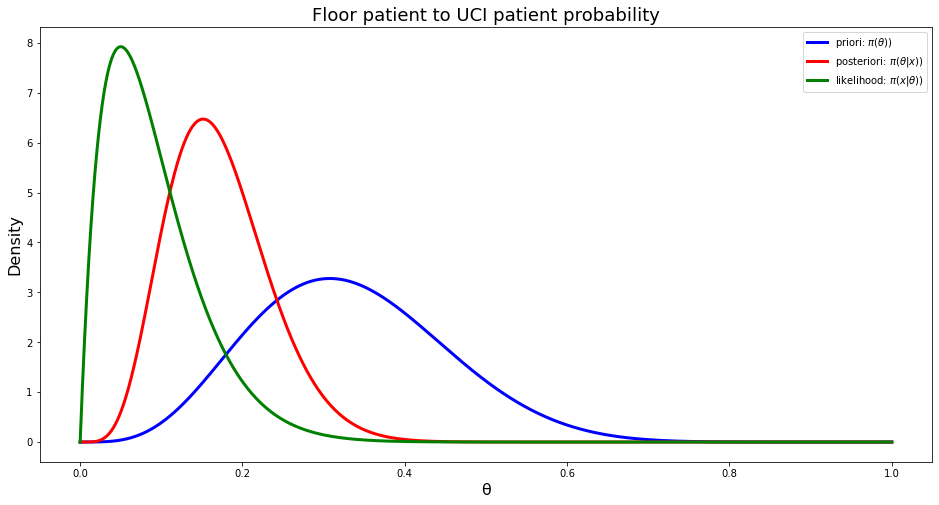

In [3]:
a, b, n, k = 5, 10, 20, 1
plot_Bayes(a, b, n, k)

Ahora, realizamos el experimento con n = 100 y k = 5.

Expected probability a priori: 0.3333333333333333
Expected probability a posteriori: 0.08695652173913043
Maximum likelihood: 0.05000500050005001
Experiment with: 
 Total patients: 100 
 UCI: 5


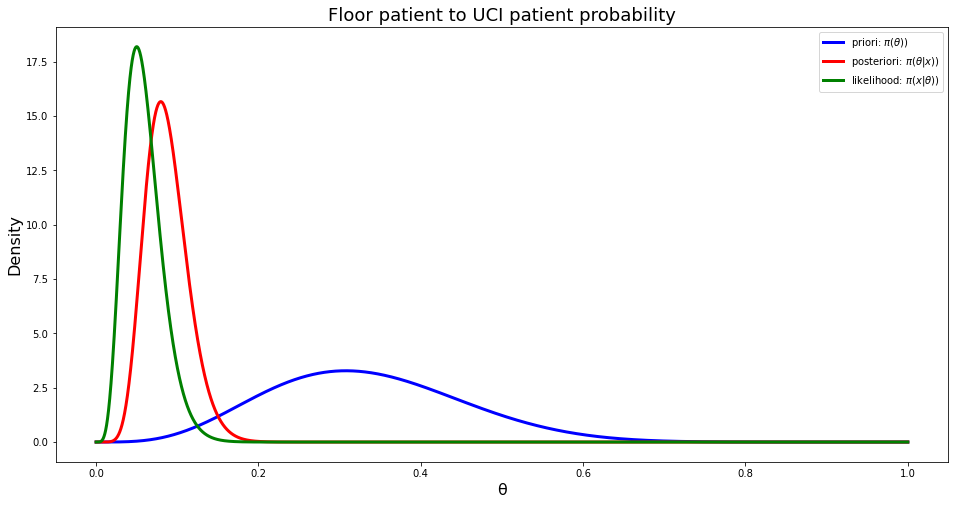

In [4]:
a, b, n, k = 5, 10, 100, 5
plot_Bayes(a, b, n, k)

En este caso, la probabilidad a priori se mantiene igual porque depende únicamente de $\alpha$ y $\beta$, la probabilidad a posteriori cambia porque depende de $n$ y $k$, y la máxima verosimilitud se mantiene pues únicamente depende del cociente $\frac{k}{n}$.

### Solución: Simulación Monte Carlo

    Expected probability a posteriori MC: 0.171447 +- 0.009
    Confidence interval α = 0.22
    Experimento: 
     Total pacientes:20  UCI:5

![](3.png)

$\textbf{Remark 2: Propagación del error}$ Supongamos que $Z$ es el
cociente de dos v.a $Z = \frac X Y$, si estimamos el valor esperado de
$\mu_Z$ por ejemplo mediante 

$$
\widehat{\mu _z} = \frac{\sum_{i=1}^n x_i}{\sum_{i=1}^n y_i} 
$$

donde $\{x_0,x_1, \ldots, x_n \}$ y $\{y_0, y_1, \ldots, y_n \}$ son
muestras de $X$ e $Y$ respectivamente ¿cómo estimar la varianza de
$\widehat{\mu_z}$? Podemos interpretar $x$ e $y$ como una $\textit{medida con un error asociado}$ ($x\pm \delta x$, $x\pm \delta x$) y estimar el error de la medida de $z$ en el $\textit{peor caso}$

\begin{align*} 
    (z + \delta z) (y + \delta y) 
    &= x + \delta x \\ zy + z \delta y + y \, \delta z + \delta z \; \delta y 
    &= x + \delta x \\
\end{align*}

Si en la ecuación anterior se dividen los
dos miembros por \$x\$ y asumiendo el peor caso (los errores se
suman) 
$$ 
\frac{\delta z}{z} = \frac{\delta x}{x} +
\frac{\delta y}{y} 
$$
</div>

### NUESTRA IMPLEMENTACIÓN

Para estimar el valor esperado a posteriori, 
\begin{equation}
\begin{split}
E[\theta]_{posteriori} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,\beta=10) \; d \theta}
\end{split}
\end{equation}
Se puede hacer de manera analítica (en este caso sí se puede pese a que no es fácil) o mediante integración Monte Carlo, estimando el numerador y el denominador.

Por un lado, podemos calcular la integral de manera analítica para $n$ y $k$ fijos. Teniendo en cuenta la forma de las funciones beta y que sus factores de normalización dependen únicamente de los parámetros $\alpha$ y $\beta$ (fijos), el valor a posteriori es:
\begin{equation}
\begin{split}
E[\theta]_{posteriori} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}\; \; \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \; d \theta } {\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \; d \theta}
\end{split}
\end{equation}
El resultado de esta integral se puede calcular de manera analítica, o teniendo en cuenta que $\pi(\theta|x)$ es una distribución Beta, como bien dice el enunciado, el valor esperado a posteriori será: $\mu_{posterior} = \frac{\alpha + k}{\alpha + \beta + n}$.
Por ello, compararemos ambos resultados y veremos si obtenemos lo mismo.

In [5]:
def calculate_int_num():
    return quad(lambda theta, a=5, b=10, k=1, n=20: theta**(k+1)*(1-theta)**(n-k)*theta**(a-1)*(1-theta)**(b-1), 0, 1)[0]

def calculate_int_den():
    return quad(lambda theta, a=5, b=10, k=1, n=20: theta**(k)*(1-theta)**(n-k)*theta**(a-1)*(1-theta)**(b-1), 0, 1)[0]

def compare_value_posteriori(a, b, k, n):
    tol = 1e-4
    value_simple = (a + k)/(a + b + n)
    numerator = calculate_int_num()
    denominator = calculate_int_den()
    value_int = numerator/denominator
    return (abs(value_simple - value_int) <= tol)

In [6]:
compare_value_posteriori(5, 10, 1, 20)

True

Y podemos hacer esto para el primer caso ($k$ = 1, $n$ = 20) y para el segundo ($k$ = 5, $n$ = 100).

In [7]:
def calculate_int_num():
    return quad(lambda theta, a=5, b=10, k=5, n=100: theta**(k+1)*(1-theta)**(n-k)*theta**(a-1)*(1-theta)**(b-1), 0, 1)[0]

def calculate_int_den():
    return quad(lambda theta, a=5, b=10, k=5, n=100: theta**(k)*(1-theta)**(n-k)*theta**(a-1)*(1-theta)**(b-1), 0, 1)[0]

def compare_value_posteriori(a, b, k, n):
    tol = 1e-4
    value_simple = (a + k)/(a + b + n)
    numerator = calculate_int_num()
    denominator = calculate_int_den()
    value_int = numerator/denominator
    return (abs(value_simple - value_int) <= tol)

In [8]:
compare_value_posteriori(5, 10, 5, 100)

True

Como se puede observar, obtenemos el mismo valor tanto como para la fórmula aplicada directamente como para los métodos de cuadratura, que tienen una precisión lo suficientemente buena. 

Ahora, calcularemos el valor esperado a posteriori mediante métodos Monte Carlo, donde estimaremos el valor del numerador y denominador con un intervalo de confianza $1 - \alpha$, dado por:
\begin{equation}
\mu = \hat{\mu} \pm \epsilon
\end{equation}
Donde $\epsilon$ hace referencia al error.

Para estimar el valor de la integral mediante el método Monte Carlo, generaremos muestras de la distribución a priori $\pi(\theta)$ tal que el valor esperado:

\begin{equation}
\hat{\mu} = \frac{I_1}{I_2} = \frac{\sum \theta_i^{k+1} (1-\theta_i)^{n-k}}{\sum \theta_i^{k} (1-\theta_i)^{n-k}} = 
\frac{\sum H_1 (\theta)}{\sum H_2 (\theta)}
\end{equation}

Y, el error vendrá dado por:
\begin{equation}
\epsilon = \frac{\hat{\mu}_{z_{\alpha/2}}}{\sqrt{n}}\left (\frac{s_{I_1}}{I_1} + \frac{s_{I_2}}{I_2} \right)
\end{equation}

Donde, los términos $s_{I_1}$ y $s_{I_2}$ son:
\begin{equation}
s_{I_1} = \sqrt{\frac{1}{n-1}\sum_i(H_1(\theta_i) - I_1)^2} \hspace{2cm} s_{I_1} = \sqrt{\frac{1}{n-1}\sum_i(H_2(\theta_i) - I_2)^2}
\end{equation}

Podemos realizar estas simulaciones de dos maneras: mediante una simulación independiente de varios tamaños o mediante varias simulaciones independientes y varios tamaños.

In [9]:
def estim_mean_error_posteriori(i1, i2, n, alpha): 
    """
    La función calcula las estimaciones de la media y el error de E[θ] (posteriori)
    donde:
        i1: numerador
        i2: denominador
        n: número de muestras
        alpha: nivel de significancia estadística
        
    """
    
    size = np.arange(start=1, stop = n+1, step=1)
    
    #Media muestral
    first_mean, second_mean = np.cumsum(i1)/size, np.cumsum(i2)/size
    mean = first_mean/second_mean
    
    # Varianza y desviación típica muestral
    first_s2, second_s2 = (i1-first_mean)**2, (i2-second_mean)**2
    first_s2[0], second_s2[0] = 0.0, 0.0
    first_s2[1:] = np.cumsum(first_s2)[1:]/size[0:-1]
    second_s2[1:] = np.cumsum(second_s2)[1:]/size[0:-1]
    first_std, second_std = np.sqrt(first_s2), np.sqrt(second_s2)
    
    # Error
    first_error = first_std/first_mean
    second_error = second_std/second_mean
    error = (first_error+second_error)*mean
      
    # Intervalos de confianza
    z_alpha = norm.ppf(1 - (alpha/2))
    ic_inf = mean - z_alpha/np.sqrt(size)*error
    ic_sup = mean + z_alpha/np.sqrt(size)*error
    
    return {'size' : size, 'media' : mean, 'ic_inf': ic_inf, 'ic_sup' : ic_sup}

def estim_num_denom(q, k, n, theta, p):
    """
    La función calcula el estimador del numerador y denominador de E[θ] (posteriori)
    donde:
        q: 1 -> numerador, 2 -> denominador
        x: muestra
        k: número de pacientes en UCI
        n: número de muestras
        p: distribución
    """
    if q == 1: # Numerador
        return (theta**(k+1))*((1-theta)**(n-k))*p
    else: # Denominador
        return (theta**k)*((1-theta)**(n-k))*p

def get_ic_one_simulation(a, b, k, n, N, alpha, generator_beta=True):
    """
    Calcula el intervalo de confianza para E[θ] (posteriori)
    donde:
        a: param alpha de beta
        b: param beta de beta
        k: número de éxitos
        n: número de muestras
        N: tamaño máximo de la muestra
        alpha: nivel de significancia estadística
        generator_beta: si la muestra viene de la Beta
    """
    # Generamos muestras para comprobar si es de Beta/Uniforme
    if generator_beta:
        sample = beta(a, b).rvs(N)
        p = 1
    else:
        sample = uniform.rvs(loc=0, scale=1, size=N)
        p = beta(a, b).pdf(x=sample)
    
    # Estimación de los integrandos
    i1 = estim_num_denom(1, k, n, sample, p)
    i2 = estim_num_denom(2, k, n, sample, p)
    
    # Cálculo del error
    mean = np.sum(i1)/np.sum(i2)
    z_alpha = norm.ppf(1-(alpha/2))
    error = mean*z_alpha/np.sqrt(N)*(np.std(i1)/np.mean(i1)+np.std(i2)/np.mean(i2))

    print("Expected probability a posteriori using formula: {0}".format((a+k)/(a+b+n)))
    print("Expected probability a posteriori: {0} +- {1}".format(mean, error))
    print("Confidence interval α: {0}".format(alpha))
    print("Experimento: \n Total pacientes: {0} \t UCI: {1}".format(n, k))
    print(" N = {}".format(N))

    return estim_mean_error_posteriori(i1=i1, i2=i2, n=N, alpha=alpha)

def get_ic_many_simulation(a, b, k, n, N, nsimul, alpha, generator_beta=True):
    """
    Calcula el intervalo de confianza para E[θ] (posteriori) haciendo nsimul
    donde:
        a: param alpha de beta
        b: param beta de beta
        k: número de éxitos
        n: número de muestras
        N: tamaño máximo de la muestra
        nsimul: número de simulaciones
        alpha: nivel de significancia estadística
        generator_beta: si la muestra viene de la Beta
    """
    
    r_all = np.zeros((N, nsimul))
    # Generamos muestras dependiendo de si es de Beta/Uniforme
    if generator_beta:
        sample = beta(a, b).rvs(N*nsimul).reshape((nsimul, N))
        p = 1
    else:
        sample = uniform.rvs(loc = 0, scale = 1, size = N*nsimul).reshape((nsimul, N))
        
    # Calculamos el error para nsimul simulaciones
    for simul in np.arange(nsimul):
        x = sample[simul,:]
        if not generator_beta:
            p = beta(a, b).pdf(x=x)
        i1 = estim_num_denom(1, k, n, x, p)
        i2 = estim_num_denom(2, k, n, x, p)
        r = estim_mean_error_posteriori(i1=i1, i2=i2, alpha=alpha, n=N)    
        r_all[:, simul] = r['media']
    
    return r_all

def plot_e_posteriori(r1, r_all, N, e_theo):
    """
    Plot de las simulaciones realizadas por Monte Carlo para calcular el intervalo de confianza para E[θ] (posteriori)
    donde:
        r1: estimación del intervalo de confianza (1 simulación)
        r_all: estimación del intervalo de confianza (nsimul simulaciones)
        N: máximo tamaño de la muestra
        e_theo: valor esperado de theta a posteriori teórico
    """
    fig, ax = plt.subplots(1,2, figsize=(16, 8), sharey=True)
    plt.ylim([-0.1, 0.3])

    ax[0].plot (r1['size'], r1['media'],  c='blue' ,linestyle='dotted', lw=0.8)
    ax[0].plot (r1['size'], r1['ic_inf'], c='blue', alpha=0.4, lw=0.2)
    ax[0].plot (r1['size'], r1['ic_sup'], c='blue', alpha=0.4, lw=0.2)
    ax[0].fill_between(r1['size'],r1['ic_inf'],r1['ic_sup'], alpha=0.2)

    ax[0].hlines(e_theo, 0, r1['size'][-1], colors='red', lw=0.8, linestyle ="--")
    ax[0].set_xlabel("Sample size")
    ax[0].set_ylabel (r'$\hat{\mu}_{posteriori}$')
    ax[0].grid(lw=0.2)

    xx = np.arange(1, N+1)
    ax[1].hlines(e_theo, 0, xx[-1], colors='red', linewidth=1, linestyle ="--")
    ax[1].plot(xx, r_all, linewidth=0.2, alpha=0.4)
    ax[1].set_ylabel (r'$\hat{\mu}_{posteriori}$')
    ax[1].set_xlabel("Sample size")
    ax[1].grid(lw=0.2)

    plt.show()

Representamos de nuevo para los casos ($k$ = 1, $n$ = 20) y ($k$ = 5, $n$ = 100).

Expected probability a posteriori using formula: 0.17142857142857143
Expected probability a posteriori: 0.1722027124644005 +- 0.007532106824536263
Confidence interval α: 0.22
Experimento: 
 Total pacientes: 20 	 UCI: 1
 N = 10000


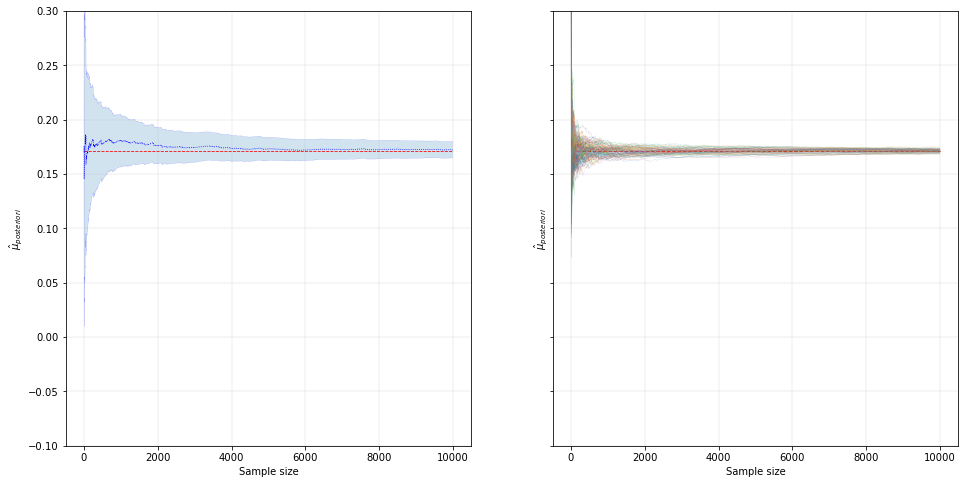

In [10]:
np.random.seed(123)

# Inicializamos variables
a, b, k, n = 5, 10, 1, 20
N = 10000 # Tamaño máximo de la muestra
alpha = 0.22 # Nivel de significancia
nsimul = 100 # Número de simulaciones independientes

# Una única simulación independiente. Varios tamaños
r1 = get_ic_one_simulation(a, b, k, n, N, alpha)

# Muchas simulaciones  (nsimul)
r_all = get_ic_many_simulation(a, b, k, n, N, nsimul, alpha)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)

Expected probability a posteriori using formula: 0.08695652173913043
Expected probability a posteriori: 0.08666032060660518 +- 0.017040794614440625
Confidence interval α: 0.22
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 10000


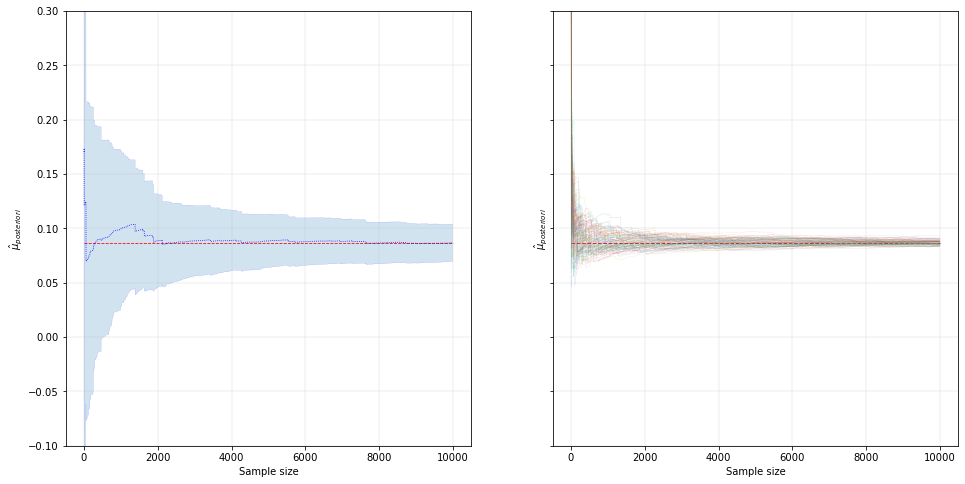

In [11]:
np.random.seed(123)

# Inicializamos variables
a, b, k, n = 5, 10, 5, 100
N = 10000 # Tamaño máximo de la muestra
alpha = 0.22 # Nivel de significancia
nsimul = 100 # Número de simulaciones independientes

# Una única simulación independiente. Varios tamaños
r1 = get_ic_one_simulation(a, b, k, n, N, alpha)

# Muchas simulaciones  (nsimul)
r_all = get_ic_many_simulation(a, b, k, n, N, nsimul, alpha)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)

**Cuestiones**:


-   **¿Por que se debe utilizar la misma muestra de $\theta$ en el numerador y denominador para estimar $\mu_{posterior}$?**
      

Porque el denominador $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta$ es una constante de normalización que asegura que la integral de la distribución posteriori suma 1.


-   **¿Por que a la hora de hacer la simulación de M.C hemos podido utilizar una función sin normalizar proporcional a $\pi(x |\theta)$ eq. (5) y no $\pi(x | \theta)$?**


Porque las constantes de normalización asociadas a las distribuciones beta se anulan el numerador y denominador.

\begin{equation}
\begin{split}
E[\theta]_{posteriori} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,\beta=10) \; d \theta}
\end{split}
\end{equation}



-   **¿Se comporta correctamente tu estimación cuando aumenta el tamaño del experimento?**


Para tamaños de muestra pequeños, el valor estimado $\widehat{\mu}_{posterior}$ se aleja más del teórico y presenta mayor varianza. Sin embargo, al aumentar el tamaño muestral, apenas difiere respecto al valor teórico $\mu_{posterior}$ y disminuye considerablemente la varianza. 

Para un tamaño muestral igual a 10.000, k = 1 y n = 20 se obtenía un error estimado aproximadamente del 0.7%, mientras que para 10000 muestras con k = 5 y n = 100 se obtiene un error del 1.7% aproximadamente.
            

-   **¿Cómo de fiable es la estimación del error que hemos hecho? Discute que valor de $z_{\alpha/2}$ es apropiado.**

Debido a que hemos fijado $\alpha = 0.22$, esta estimación tendrá una fiabilidad del 78%. Es decir, el valor real caerá dentro de nuestro resultado $\pm$ el error el 78% de las veces.



-   **Supón que no se dispone de un generador de números aleatorios
    para la distribución a priori (porqué o bien no dispones de un
    algoritmo o este es muy ineficaz) ¿Podrías estimar
    $\mu_{posterior}$? Estima el valor de $\mu_{posterior}$
    sin utilizar el generador de una muestra de Beta (por
    ejemplo utiliza una distribución $\mathcal{U}(0,1)$). Discute
    el intervalo de confianza de la estimación.**



Ahora, haremos los mismos cálculos que hemos realizado previamente, pero para una distribución uniforme (0, 1).

Expected probability a posteriori using formula: 0.17142857142857143
Expected probability a posteriori: 0.17020883747340815 +- 0.008067685703260089
Confidence interval α: 0.2
Experimento: 
 Total pacientes: 20 	 UCI: 1
 N = 10000


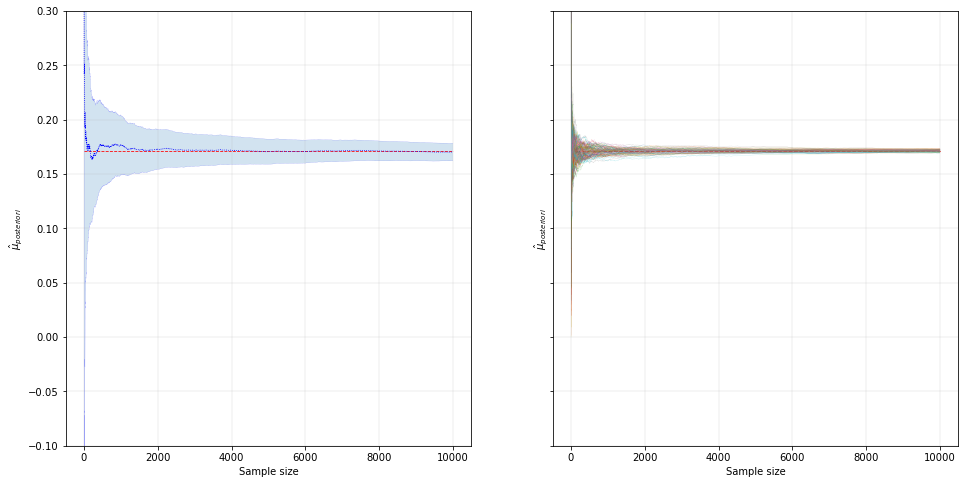

Expected probability a posteriori using formula: 0.08695652173913043
Expected probability a posteriori: 0.08648032079387223 +- 0.006934125898616935
Confidence interval α: 0.2
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 10000


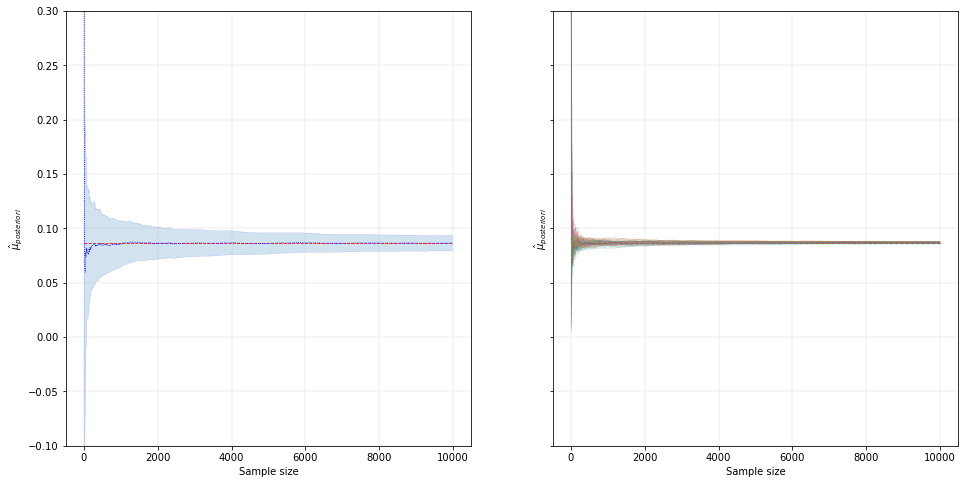

In [12]:
np.random.seed(123)

# Inicialización de variables
N = 10000 # Tamaño máximo de la muestra
alpha = 0.2 # Nivel de significación
nsimul = 100 # Número de simulaciones independientes

########################## k = 1, n = 20 #########################
a, b, k, n = 5, 10, 1, 20

# Una simulación independiente. Varios tamaños
r1 = get_ic_one_simulation(a, b, k, n, N, alpha, False)

# Varias de simulaciones  (nsimul)
r_all = get_ic_many_simulation(a, b, k, n, N, nsimul, alpha, False)

# Representación de ambas
post = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, post)

########################## k = 5, n = 100 #######################

a, b, k, n = 5, 10, 5, 100

# Una única simulación independiente. Varios tamaños
r1 = get_ic_one_simulation(a, b, k, n, N, alpha, False)

# Varias simulaciones  (nsimul)
r_all = get_ic_many_simulation(a, b, k, n, N, nsimul, alpha, False)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)


Cuando utilizamos una muestra uniforme, la estimación a posterior es:
\begin{equation}
\hat{\mu} = \frac{I_1}{I_2} = \frac{\sum u_i^{k+1} (1-u_i)^{n-k} B(u_i | \alpha = 5, \beta = 10)}{\sum u_i^{k} (1-u_i)^{n-k} B(u_i | \alpha = 5, \beta = 10)} = 
\frac{\sum H_1 (u_i)}{\sum H_2 (u_i)}
\end{equation}

En este caso, se observa que tenemos una varianza mucho menor.

        Expected probability a posteriori MC: 0.086273 +- 0.013
        Confidence interval α = 0.22
        Experimento: 
        Total pacientes:100  UCI:5

<h2 id="ejercicio-2">Ejercicio 2</h2>
<p>Estimar empíricamente la función de densidad de
probabilidad <em>a posteriori</em> $\pi(\theta | x)$ del ejercicio
anterior y validarla con el resultado teórico. Discutir los resultados.</p>
</div>


### Introducción<a href="#Introducción" class="anchor-link"></a>

Si recuerdas en el ejercicio anterior estimamos, utilizando Monte Carlo,
el valor esperado de $\theta$ *a posteriori*, es decir, una vez
realizado el experimento. Recuerda que lo estimamos **sin** necesidad de
conocer la distribución a posteriori $\pi(\theta | x)$. Para ello
utilizamos el Teorema de Bayes. Además validamos nuestra estimación con
la solución analítica.

Ahora nos planteamos ¿es posible generar una muestra de la variable
aleatoria de la distribución *a posteriori* $\pi(\theta | x)$?.
Para ello se propone utilizar un método de aceptación y rechazo y
validarlo con la solución analítica.

### Ayuda<a href="#Ayuda" class="anchor-link"></a>

El algoritmo consistirá en generar una muestra $\{\theta_0,
\theta_1, \theta_2, \cdots, \theta_n\}$ de la distribución *a
priori* $\pi(\theta)$ y aceptar como valores de la distribución *a
psoteriori* $\pi(\theta | x)$ aquellos $\theta_i$ que
satisfagan un determinado criterio de aceptación/rechazo.

-   Un algoritmo y criterio *tentativo* podría ser:

>    1.  Generar una muestra $\{\theta_0, \theta_1, \theta_2,
\>    \cdots, \theta_n\}$ de la distribución a priori
>    $\pi(\theta)$
>    
>    2.  Aceptar $\theta_i$ con probabilidad $$ p = \frac{
\>    \pi(\theta_i | x) }{c \cdot \pi(\theta_i) } $$ donde
>    $c$ es, como de costumbre, una constante tal que para todo
>    $\theta$, $p \in [0, 1]$. Para aplicar el criterio
>    anterior podríamos, como de costumbre, generar una muestra
>    $\{u_0, u_1, u_2, \cdots, u_n\}$ de la distribución
>    uniforme $U(0,1)$ y aceptar $\theta_i$ si $u_i < \frac{
\>    \pi(\theta_i | x) }{c \cdot \pi(\theta_i) }$

Es decir, tratamos de aplicar el mismo algoritmo de aceptación/rechazo
visto en clase. El problema con este *criterio tentativo* es evidente.
Para aplicarlo necesitamos: (i) evaluar $\pi(\theta | x)$ en
$\theta_i$ y (ii) calcular previamente el valor de la constante
$c$. Pero ¿Cómo podemos hacerlo si precisamente desconocemos la
distribución $\pi(\theta | x)$?

-   ¿Qúe podemos hacer? Recurrir al Teorema de Bayes $$ \frac{
    \pi(\theta | x) }{ \pi(\theta) } = \frac{ \pi(x | \theta) }
    { \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \;
    d\theta} $$

    pero, en vez de utilizar el lado izquierdo de la ecuación anterior
    para evaluar la probabilidad $p$ de aceptar $\theta_i$ como en
    la ecuación (21), utilizar el miembro derecho de (22). Sin embargo,
    aun nos falta estimar el valor de $c$. Necesitamos *normalizar* el
    cociente $\frac{ \pi(x | \theta) } {
    \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \;
    d \theta} $ por una constante $c$ para que su valor este
    comprendido en el intervalo $[0, 1]$. Pero esto no es
    complicado. Sabemos que *necesariamente* $\frac{ \pi(x |
    \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta} $ está acotado: el numerador es una
    función densidad de probabilidad y el denominador es una constante,
    no depende de $\theta$. Es decir que $$ \frac{ \pi(x |
    \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d \theta} \leq \frac{ \text{argmax}_{\theta}
    \left( \pi(x | \theta) \right) } { \int_{-\infty}^{\infty}
    \pi(x | \theta) \pi(\theta) \; d \theta} = c $$

    donde $\text{argmax}_{\theta} \left( \pi(x | \theta)
    \right)$ representa al valor máximo de la verosimilitud $\pi(x
    | \theta)$. Es decir, ni siquiera necesitamos calcular la
    integral $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d \theta$ ya que cuando dividamos la
    ecuación (22) por $c$ se nos va a cancelar!!!

Además sabemos que la función de verosimilitud alcanza su máximo cuando
$\theta $ es el *valor máximo de verosimilitud* $\theta_{MLE} =
k/N$, siendo $N$ el número total de pacientes y $k$ el número de
pacientes que ingresan en la UCI. Recopilando todo:

-   Algoritmo final para obtener una muestra de $\pi(\theta |
    x)$ \>

    > 1.  Calcular $a = \text{argmax}_{\theta} \left( \pi(x |
    \>     \theta) \right) $
    > 2.  Generar una muestra $\{\theta_0, \theta_1, \theta_2,
    \>     \cdots, \theta_n\}$ de la distribución a priori
    \>     $\pi(\theta)$
    \> 3.  Aceptar $\theta_i$ con probabilidad $$ p = \frac{
    \>     \pi(x | \theta) } {c \cdot \int_{-\infty}^{\infty}
    \>     \pi(x | \theta) \pi(\theta) \; d \theta} = \frac{
    \>     \pi(x | \theta) }{a} $$

### Resultados Simulación Monte Carlo<a href="#Resultados-Simulación-Monte-Carlo" class="anchor-link"></a>

En la siguiente gráfica se muestra un histograma con la estimación
empírica de la función de densidad de probabilidad a posteriori
$\pi(\theta | x)$ junto con el resultado teórico (en azul
distribución Beta de parámetros $a$ y $b$ conocidos).

La eficiencia del algoritmo de aceptación/rechazo ha sido del
$6.52\%$

    Efficiency= 0.0652
    KstestResult(statistic=0.009582283853363405, pvalue=0.9228198772005989)
    Chi-square test:
    Power_divergenceResult(statistic=17.990045654391984, pvalue=0.7580290555132925)


![](4.png)

- ¿Por que es tan baja la tasa de eficiencia? 

La tasa de eficiencia es un reflejo del solapamiento entre la distribución a priori  π(θ) , la distribución de la que se muestrea, y la distribución a posteriori  π(θ|x) . Cuanto mas alejada esté la primera de la segunda, mayor será el porcentaje de muetras rechazadas. Recordad que  $σ^{2}$ $\rightarrow$ 0  de la distribución a posteriori cuando  N $\rightarrow$ ∞ 

- ¿Como mejorar la tasa de eficiencia? 

Es posible realizar un Monte Carlo evolutivo cuando el conocimiento del experimento se incorpora paulatinamente.

Efficiency 0.024456666666666668
KstestResult(statistic=0.006920846988636042, pvalue=0.8711631674333907)
N = 300000


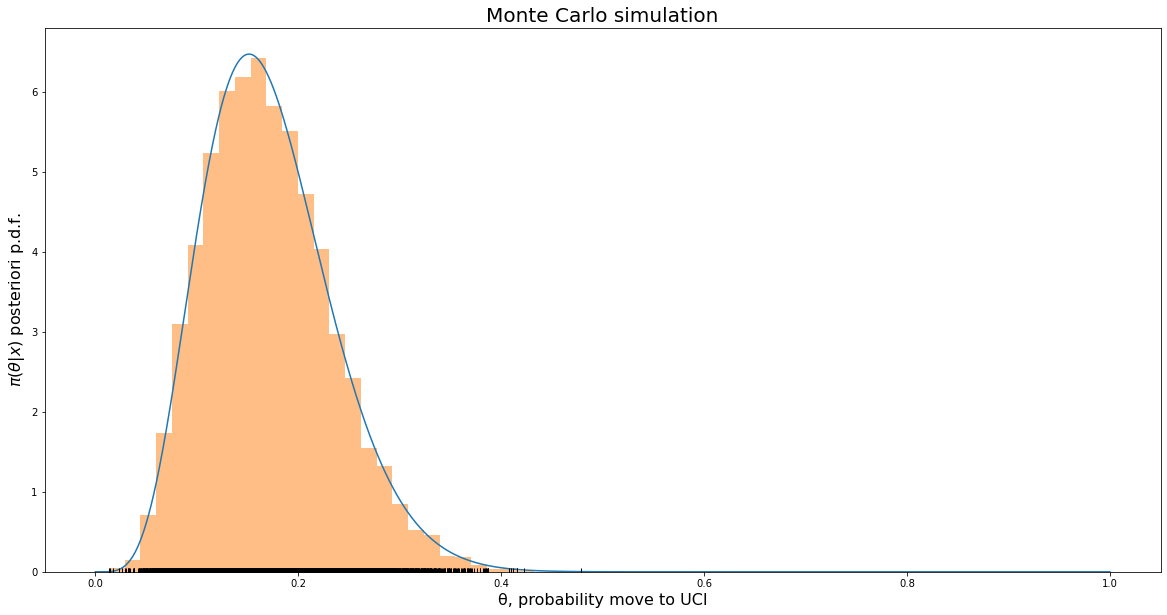

In [13]:
np.random.seed(123)

a, b, k, n = 5, 10, 1, 20
N = 300000

# Comparativa con el resultado analítico
theta_range = np.linspace(0, 1, N)
posteriori = beta(a+k, b+(n-k)).pdf(x=theta_range)

# Generación de muestras a partir de la priori
theta_samples = beta.rvs(a,b,size=N)
p = lambda x: x**k*(1-x)**(n-k)*n/k

# Condición de aceptación y rechazo 
unif = uniform.rvs(size = N)
condi_x = theta_samples[unif  < p(theta_samples)]

# Resultados de K-S
print(f'Efficiency {len(condi_x) / N}')
print(kstest(condi_x, beta.cdf, args=(a+k, b+(n-k))) )
print("N = {0}".format(N))

# Gráfica con los resultados
plt.figure(figsize=(20,10))
plt.plot(theta_range, posteriori)
plt.plot(condi_x, [0.01]*len(condi_x), '|', color='k')
plt.hist(condi_x,density=True, linewidth=1, bins=30,label='Sample',alpha=0.5)
plt.title('Monte Carlo simulation',fontsize=20)
plt.xlabel('θ, probability move to UCI', fontsize=16)
plt.ylabel(r'$\pi(\theta|x)$ posteriori p.d.f.', fontsize=16)
plt.show()

En conclusión, al aumentar el número de muestras ( N = 30.000) se obtiene un eficiencia del 2.45% además de un p-valor de 0.8711 > 0.05, por lo que no podemos rechazar la hipótesis de que la muestra siga una distribución $\beta$(a+k, b+(n-k)).